In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
##Import libraries:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
import matplotlib.pylab as plt
#import warnings
#warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import mean_squared_error
from math import sqrt
import csv
import pandas as pd
import numpy as np
import os
import pickle
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import random
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_log_error as MSLE
random.seed(123)
plt.rcParams["font.sans-serif"]=["SimHei"]
from datetime import datetime
pd.set_option("display.max_rows", 1000)    #設定最大能顯示1000rows
pd.set_option("display.max_columns", 1000) #設定最大能顯示1000columns
path = r"C:\Users\user\Desktop\ETC"

In [3]:
acc_1_fin=pd.read_csv(path+r"/acc1_fin_dummy_and_sd.csv")
print(acc_1_fin.columns)
print(acc_1_fin.shape)

Index(['Unnamed: 0', '回堵情況', '處理時間', '總通行量', '總平均車速', '里程數', '速限', '24小時內死亡人數',
       '2-30日內死亡人數', '受傷人數',
       ...
       '肇因研判(子)_44', '肇因研判(子)_48', '肇因研判(子)_49', '肇因研判(子)_50', '肇因研判(子)_65',
       '肇因研判(子)_67', '是否為連續假日_1', '是否為假日_1', '是否開放路肩_1', '通報級數'],
      dtype='object', length=326)
(7242, 326)


In [4]:
acc_1_fin=acc_1_fin.drop("Unnamed: 0",axis = 1)
acc_1_fin=acc_1_fin.drop("回堵情況",axis = 1)
X1 = acc_1_fin.drop("處理時間",axis = 1)
y1 = acc_1_fin["處理時間"]

In [5]:
X1.columns

Index(['總通行量', '總平均車速', '里程數', '速限', '24小時內死亡人數', '2-30日內死亡人數', '受傷人數',
       '事故涉及車輛數', '通報地區_北控', '通報地區_南控',
       ...
       '肇因研判(子)_44', '肇因研判(子)_48', '肇因研判(子)_49', '肇因研判(子)_50', '肇因研判(子)_65',
       '肇因研判(子)_67', '是否為連續假日_1', '是否為假日_1', '是否開放路肩_1', '通報級數'],
      dtype='object', length=323)

In [6]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2) # 0.2 test_size means 20%

In [7]:
# 1: max_depth 和 min_child_weight參數調優

param_test1 = {'max_depth':range(3,10),'min_child_weight':range(1,10)}
gsearch1 = GridSearchCV(estimator = XGBRegressor(booster='gbtree',
                    objective= 'reg:linear',
                    eval_metric='rmse',
                    gamma = 0.1,
                    subsample= 0.8,
                    colsample_bytree= 0.8,
                    tree_method= 'exact',
                    learning_rate=0.1,
                    n_estimators=100,
                    nthread=4,
                    scale_pos_weight=1,
                    seed=27),
                    param_grid = param_test1, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=10)
gsearch1.fit(X1_train,y1_train)
gsearch1.best_params_

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


[09:38:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[09:38:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


{'max_depth': 3, 'min_child_weight': 9}

In [8]:
param_test3 = {
    'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBRegressor(booster='gbtree',
                    objective= 'reg:linear',
                    eval_metric='rmse',
                    min_child_weight= 9,
                    max_depth= 3,
                    subsample= 0.8,
                    colsample_bytree= 0.8,
                    tree_method= 'exact',
                    learning_rate=0.1,
                    n_estimators=100,
                    nthread=4,
                    scale_pos_weight=1,
                    seed=27),
                       param_grid = param_test3, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=10)
gsearch3.fit(X1_train,y1_train)

[09:39:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[09:39:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=10, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster='gbtree',
                                    colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.8,
                                    eval_metric='rmse', gamma=None, gpu_id=None,
                                    importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=0.1, max_delta_step=None,
                                    max_depth=3, min_child_weight=9,
                                    missing=nan, monotone_constrain...
                                    num_parallel_tree=None,
                                    objective='reg:linear', random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=1, seed=27, subsample=0.8,
                                    tree

In [9]:
gsearch3.best_params_

{'gamma': 0.0}

In [10]:
param_test4 = {
    'subsample':[i/10.0 for i in range(6,10)],
    'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = XGBRegressor(booster='gbtree',
                    objective= 'reg:linear',
                    eval_metric='rmse',
                    gamma = 0,
                    min_child_weight= 9,
                    max_depth= 3,
                    tree_method= 'exact',
                    learning_rate=0.1,
                    n_estimators=100,
                    nthread=4,
                    scale_pos_weight=1,
                    seed=27),
                       param_grid = param_test4, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=10)
gsearch4.fit(X1_train,y1_train)

[09:40:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[09:40:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=10, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster='gbtree',
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, eval_metric='rmse',
                                    gamma=0, gpu_id=None,
                                    importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=0.1, max_delta_step=None,
                                    max_depth=3, min_child_weight=9,
                                    missing=nan, monotone_constraints...
                                    objective='reg:linear', random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=1, seed=27, subsample=None,
                                    tree_method='exact',
      

In [11]:
gsearch4.best_params_

{'colsample_bytree': 0.6, 'subsample': 0.9}

In [12]:
param_test6 = {
    'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch6 = GridSearchCV(estimator = XGBRegressor(booster='gbtree',
                    objective= 'reg:linear',
                    eval_metric='rmse',
                    gamma = 0,
                    min_child_weight= 9,
                    max_depth= 3,
                    subsample= 0.9,
                    colsample_bytree= 0.6,
                    tree_method= 'exact',
                    learning_rate=0.1,
                    n_estimators=100,
                    nthread=4,
                    scale_pos_weight=1,
                    seed=27),
                       param_grid = param_test6, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=10)
gsearch6.fit(X1_train,y1_train)

[09:41:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[09:41:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=10, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster='gbtree',
                                    colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.6,
                                    eval_metric='rmse', gamma=0, gpu_id=None,
                                    importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=0.1, max_delta_step=None,
                                    max_depth=3, min_child_weight=9,
                                    missing=nan, monotone_constraints=...
                                    num_parallel_tree=None,
                                    objective='reg:linear', random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=1, seed=27, subsample=0.9,
                                    tree

In [13]:
gsearch6.best_params_

{'reg_alpha': 100}

In [16]:
param_test7 = {
    'reg_alpha':np.linspace(100, 200, 20)
}
gsearch7 = GridSearchCV(estimator = XGBRegressor(booster='gbtree',
                    objective= 'reg:linear',
                    eval_metric='rmse',
                    gamma = 0,
                    min_child_weight= 9,
                    max_depth= 3,
                    subsample= 0.9,
                    colsample_bytree= 0.6,
                    tree_method= 'exact',
                    learning_rate=0.1,
                    n_estimators=100,
                    nthread=4,
                    scale_pos_weight=1,
                    seed=27),
                       param_grid = param_test7, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=10)
gsearch7.fit(X1_train,y1_train)

[09:48:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[09:48:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=10, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster='gbtree',
                                    colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.6,
                                    eval_metric='rmse', gamma=0, gpu_id=None,
                                    importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=0.1, max_delta_step=None,
                                    max_depth=3, min_child_weight=9,
                                    missing=nan, monotone_constraints=...
             param_grid={'reg_alpha': array([100.        , 105.26315789, 110.52631579, 115.78947368,
       121.05263158, 126.31578947, 131.57894737, 136.84210526,
       142.10526316, 147.36842105, 152.63157895, 157.89473684,
       163.15789474, 168.42105263, 173.68421053, 178.94736842,
       184.21052632, 189.47368421, 194

In [17]:
gsearch7.best_params_

{'reg_alpha': 189.47368421052633}

In [ ]:
#Grid seach on subsample and max_features
#Choose all predictors except target & IDcols
param_test9 = {
    'n_estimators':[50, 100, 200, 500,1000],
    'learning_rate':[0.001, 0.01, 0.05, 0.1,0.2]
}
gsearch9 = GridSearchCV(estimator = XGBRegressor(booster='gbtree',
                    objective= 'reg:linear',
                    eval_metric='rmse',
                    gamma = 0,
                    min_child_weight= 9,
                    max_depth= 3,
                    subsample= 0.9,
                    colsample_bytree= 0.6,
                    tree_method= 'exact',
                    learning_rate=0.1,
                    n_estimators=100,
                    nthread=4,
                    scale_pos_weight=1,                           
                    reg_alpha =189.47,                           
                    seed=27),
                       param_grid = param_test9, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=10)
gsearch9.fit(X1_train,y1_train)

In [21]:
gsearch9.best_params_, 

({'learning_rate': 0.01, 'n_estimators': 500},)

In [22]:
xgb9 = XGBRegressor(booster='gbtree',
                    objective= 'reg:linear',
                    eval_metric='rmse',
                    gamma = 0,
                    min_child_weight= 9,
                    max_depth= 3,
                    subsample= 0.9,
                    colsample_bytree= 0.6,
                    tree_method= 'exact',
                    learning_rate=0.01,
                    n_estimators=500,
                    nthread=4,
                    scale_pos_weight=1,
                    reg_alpha=189,                           
                    seed=27)

In [23]:
xgb9.fit(X1_train,y1_train)

[10:09:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[10:09:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, eval_metric='rmse',
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=3, min_child_weight=9, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=4, nthread=4,
             num_parallel_tree=1, objective='reg:linear', random_state=27,
             reg_alpha=189, reg_lambda=1, scale_pos_weight=1, seed=27,
             subsample=0.9, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [24]:
## predict_y
xgb1_1_pred=xgb9.predict(X1_test)
xgb1_1_pred=xgb1_1_pred.flatten()

In [25]:
from sklearn.metrics import mean_absolute_error

In [27]:
# rmse
print(np.sqrt(((y1_test-xgb1_1_pred)**2).sum()/1451))
# mae
print(mean_absolute_error(y1_test,xgb1_1_pred))

25.232065299807747
9.319784394126666


In [65]:
var_imp=X1_train.columns[xgb9.feature_importances_>0.005]
xgb9.feature_importances_[np.where(xgb9.feature_importances_>0.005)]

array([0.02116916, 0.04620117, 0.01350159, 0.01484639, 0.05623979,
       0.01189195, 0.01381651, 0.00747605, 0.01613086, 0.00981947,
       0.01232478, 0.00701678, 0.02380207, 0.01370118, 0.0721196 ,
       0.0869873 , 0.01124522, 0.00507075, 0.01707106, 0.00747263,
       0.03766336, 0.00678136, 0.07763183, 0.03286066, 0.09501848,
       0.08486017, 0.01634112, 0.00615676, 0.01277581, 0.00509085,
       0.00675846, 0.01932135, 0.00632981, 0.04952565], dtype=float32)

In [70]:
df1 = pd.DataFrame({'var':x_importances,'importance': y_importances})

In [71]:
df1.sort_values(by=['importance'],ascending=False)

,var,importance
24,車道劃分設施-分向設施(主)_5,0.095018
15,星期_5,0.086987
25,車道劃分設施-分向設施(子)_10,0.084860
22,道路型態(子)_10,0.077632
14,月_12,0.072120
4,受傷人數,0.056240
33,通報級數,0.049526
1,總平均車速,0.046201
20,光線代碼_3,0.037663
23,道路型態(子)_14,0.032861


In [64]:
df1.to_csv("xdboost_acc.csv",encoding="utf_8_sig")

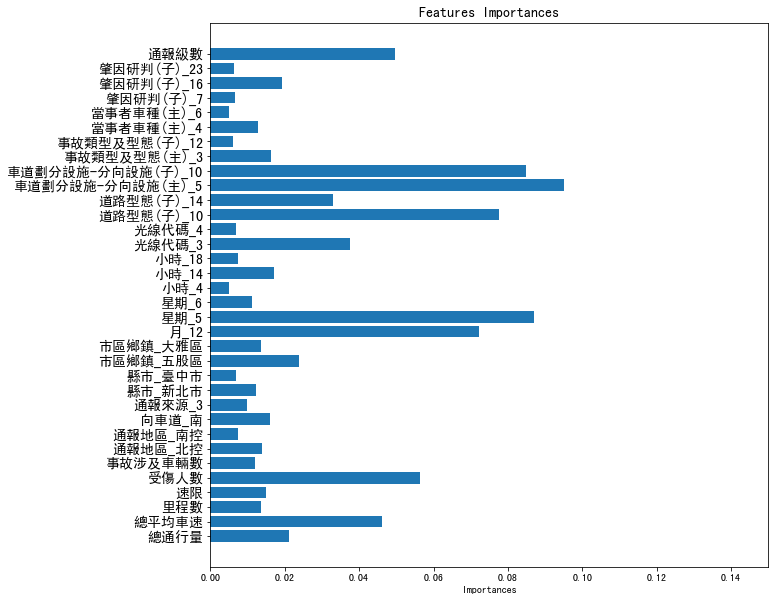

In [69]:
# 係數視覺化
y_importances = xgb9.feature_importances_[np.where(xgb9.feature_importances_>0.005)]
x_importances = var_imp
y_pos = np.arange(len(x_importances))
plt.figure(figsize=(10,10))
plt.barh(y_pos, y_importances, align='center')
plt.yticks(y_pos, x_importances,fontsize=14)
plt.xlabel('Importances')
plt.xlim(0,0.15)
plt.title('Features Importances',fontsize=14)
#plt.savefig('XGB_select(acc).png',bbox_inches='tight')
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 13))
xgb.plot_importance(xgb9, max_num_features=20, height=0.5, ax=ax)

In [ ]:
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

In [37]:
with open(file=path+r'\variable_select_varname_by_xgb.lst',mode="wb") as outhis : 
                                                    
    pickle.dump(var_imp, outhis)